In [2]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


In [3]:
sys.path.insert(0,"/mnt/lanlep2019/src/main")

In [4]:
!ln -s /mnt/lanlep2019 ~/

ln: failed to create symbolic link ‘/home/hadoop/lanlep2019’: File exists


In [5]:
os.chdir("/mnt/lanlep2019/")

In [6]:
!pwd

/mnt/lanlep2019


# once

In [7]:
!pip install hyperopt


    100% |████████████████████████████████| 122kB 3.5MB/s ta 0:00:01
    100% |████████████████████████████████| 1.7MB 862kB/s  eta 0:00:01
    100% |████████████████████████████████| 829kB 1.7MB/s  eta 0:00:01
    100% |████████████████████████████████| 419kB 3.4MB/s  eta 0:00:01
  Running setup.py bdist_wheel for networkx ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/68/f8/29/b53346a112a07d30a5a84d53f19aeadaa1a474897c0423af91
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built networkx future
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# data

In [8]:
import xgboost as xgb

In [9]:
import data
import config

In [10]:
reload (data)

<module 'data' from '/mnt/lanlep2019/src/main/data.pyc'>

In [11]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['kaggle','signal','kaggle2'] +['fwv','fwvext']+['fwvsoftmax','fwvdis','fwvdis2','fwvcos']+\
        ['fwvextsoftmax','fwvextdis','fwvextdis2','fwvextcos'] + ['fwvwholereg', 'fwvextwholereg']
    traintest = data.TrainTest('dense', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [12]:
traintest.num_dataset()

5

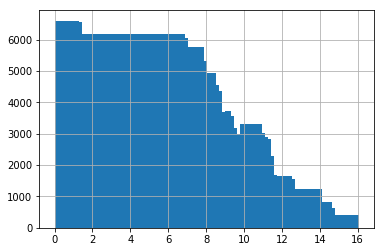

In [13]:
traintest.ydf.hist(bins=100);

In [14]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.02918898210172

In [15]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 450)

In [16]:
datadf=traintest.traindf
datadf.head()

mean        std    max    min  mean_change_abs  \
index                                                                      
quake_03_0200_105000  4.364120   6.262442  119.0 -119.0         0.000000   
quake_06_0120_099000  4.220713  10.566183  328.0 -282.0         0.000007   
quake_07_0296_013500  4.430427   7.501472  159.0 -116.0        -0.000007   
quake_03_0090_034500  4.798247   4.658487  108.0  -76.0         0.000013   
quake_08_0137_055500  4.691327   5.605683  172.0 -171.0        -0.000007   

                      mean_change_rate  abs_max  abs_min  std_first_50000  \
index                                                                       
quake_03_0200_105000      75149.867188    119.0      0.0         4.398645   
quake_06_0120_099000      75124.750000    328.0      0.0         4.937372   
quake_07_0296_013500      74910.898438    159.0      0.0         7.806824   
quake_03_0090_034500      74906.742188    108.0      0.0         5.020636   
quake_08_0137_055500      74864.296875    172.0      0.0         7.771729   

                      std_last_50000       ...         fwvextdis_pca10_2  \
index                                      ...                             
quake_03_0200_105000        7.115628       ...                 -0.867152   
quake_06_0120_099000       17.188982       ...                  0.599042   
quake_07_0296_013500        8.044850       ...                  0.276776   
quake_03_0090_034500        4.439272       ...                 -1.211162   
quake_08_0137_055500        4.222545       ...                 -1.418130   

                      fwvextdis_pca10_3  fwvextdis_pca10_4  fwvextdis_pca10_5  \
index                                                                           
quake_03_0200_105000           0.251729           0.083587           0.029462   
quake_06_0120_099000          -0.058171          -0.059255           0.019930   
quake_07_0296_013500          -0.041059           0.105883           0.042710   
quake_03_0090_034500           0.021516          -0.055162           0.053457   
quake_08_0137_055500          -0.099060          -0.037935          -0.052247   

                      fwvextdis_pca10_6  fwvextdis_pca10_7  fwvextdis_pca10_8  \
index                                                                           
quake_03_0200_105000          -0.022975          -0.039655           0.000274   
quake_06_0120_099000           0.002073           0.007824          -0.008991   
quake_07_0296_013500          -0.009792          -0.018473           0.035101   
quake_03_0090_034500          -0.030760          -0.066036           0.022193   
quake_08_0137_055500           0.054380          -0.019536           0.042780   

                      fwvextdis_pca10_9  fwv_wholereg  fwvext_wholereg  
index                                                                   
quake_03_0200_105000           0.028007     93.940635        -6.822180  
quake_06_0120_099000           0.020008     20.000997       -12.672698  
quake_07_0296_013500          -0.005669     37.947210       -38.633617  
quake_03_0090_034500           0.016614     80.679887        11.746026  
quake_08_0137_055500           0.010705     53.077711         4.727631  

[5 rows x 450 columns]

In [17]:
ydf=traintest.ydf
ydf.head()

index
quake_03_0200_105000    0.998098
quake_06_0120_099000    2.318898
quake_07_0296_013500    4.532197
quake_03_0090_034500    5.302996
quake_08_0137_055500    2.514399
Name: y, dtype: float64

In [18]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                      
quake_03_0200_105000      3
quake_06_0120_099000      6
quake_07_0296_013500      7
quake_03_0090_034500      3
quake_08_0137_055500      8

In [19]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3672  29520  36295  22631  32480  20574  18018  41240  20192  24635   

          10     11     12     13     14     15    16  
index  29228  28196  22560  21885  37761  24179  4674

In [20]:
qdf.shape,ydf.shape,datadf.shape

((417740, 1), (417740,), (417740, 450))

In [21]:
quakes=range(1,16)
quakes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [22]:
idx=qdf['index'].isin(set(quakes)).values
ydf=ydf[idx]
qdf=qdf[idx]
datadf=datadf[idx]

In [23]:
rawydf=ydf


In [24]:
qdf.shape,ydf.shape,datadf.shape

((409394, 1), (409394,), (409394, 450))

In [25]:
quake_duration= config.quake_length
quake_duration

{1: 11.540566395569977,
 2: 14.180203599212305,
 3: 8.856243408447243,
 4: 12.693878224447909,
 5: 8.05509606419685,
 6: 7.059247509412199,
 7: 16.107000305270187,
 8: 7.906144318432936,
 9: 9.637176132666621,
 10: 11.4267247041647,
 11: 11.0245547308509,
 12: 8.828581201128031,
 13: 8.565787763958841,
 14: 14.7515396785698,
 15: 9.459497978791095}

In [26]:
def align_q(t):
    print 'align to ', t
    ydf=rawydf.copy()
    for qno in quakes:
        r=t/quake_duration[qno]
        print qno, r
        ydf.loc[qdf['index']==qno] *= r
    return ydf

align to  11
1 0.95315945708
2 0.775729341475
3 1.24206161605
4 0.866559439558
5 1.36559513534
6 1.55823973948
7 0.682932873379
8 1.39132294542
9 1.14141319496
10 0.962655553957
11 0.997772723575
12 1.24595331338
13 1.28417844373
14 0.745684873558
15 1.16285240767


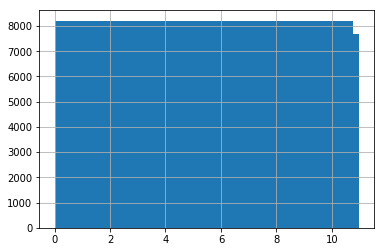

In [27]:
align_q(11).hist(bins=50);

In [28]:
import utils
n_thread= utils.get_num_thread()
n_thread

35

In [29]:
str(config.quake_weights)

'{1: 1.25, 2: 0.666666666666667, 3: 0.25, 4: 1.25, 5: 0.25, 6: 0.25, 7: 0.666666666666667, 8: 0.25, 9: 0.25, 10: 1.25, 11: 1.25, 12: 0.25, 13: 0.25, 14: 0.666666666666667, 15: 0.25}'

In [30]:
str(config.target_lengths)

'[11.4252837645, 12.6407394841, 11.6683749084, 7.0496431738, 11.4252837645, 16.5301977869, 9.723645757, 12.6407394841, 16.5301977869]'

In [31]:
w={k:v/np.mean(config.quake_weights.values()) for k,v in config.quake_weights.items()}
wdf=qdf['index'].map(lambda u: w[u])
wdf.head()

index
quake_03_0200_105000    0.416667
quake_06_0120_099000    0.416667
quake_07_0296_013500    1.111111
quake_03_0090_034500    0.416667
quake_08_0137_055500    0.416667
Name: index, dtype: float64

In [57]:
GNO=404
for u in range(len(config.target_lengths)):
    !mkdir -p input/sub/{GNO}/{u}

In [58]:
sub_path=os.path.join(config.INPUT_PATH, "sub", str(GNO))
sub_path

'/home/hadoop/lanlep2019/input/sub/404'

In [59]:
def make_sub(model, qno):
    fname =os.path.join(sub_path, str(targetno), "sub{}_q{}_at_s{}.csv".format(GNO,qno, randseed, targetno))
    print "write to " + fname    
    p = model.predict(testdf.values, ntree_limit = model.best_iteration)
    p = pd.DataFrame(p, index=testdf.index).reset_index()
    p.columns=['seg_id','time_to_failure']
    p.to_csv(fname,index=None)

In [60]:
def train_quake(qno,params,n_thread):
    assert(qno in quakes)
    print 'valid quake', qno
    teidx=(qdf['index']==qno).values
    tridx=~qdf['index'].isin({qno,0,16}).values
    t=config.target_lengths[targetno]
    ydf=align_q(t)    
    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx]
    Wtr,Wte=wdf[tridx],wdf[teidx]
    Xtr,ytr,Xte,yte, Wtr, Wte=[u.values for u in [Xtr,ytr,Xte,yte, Wtr,Wte]]
    
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = xgb.XGBRegressor(n_estimators = 5000, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, sample_weight=Wtr,
                  sample_weight_eval_set=[Wtr,None],
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae',
                    verbose=100, early_stopping_rounds=100)
    make_sub(model, qno)    
    return model.best_score, model.best_iteration

In [61]:
params = { 
          'min_child_weight': 1,
          'objective': 'reg:linear',
          'max_depth': -1,
          'learning_rate': 0.01,
          "gamma": 0,
          "metric": 'mae',
            "tree_method": "hist",
            "max_bin": 256,
          "verbosity": 1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [62]:
best_mae=1e10

In [63]:
def lgbcv(learning_rate, min_child_weight,reg_alpha,reg_lambda,max_depth,subsample,colsample_bytree, gamma,
          max_bin, seed):
    d=locals()
    newparams=params.copy()
    newparams.update(d)    
    newparams['max_depth']=int(max_depth)
    newparams['max_bin']=int(max_bin)
    scores=[]
    validScores={}
    for qno in quakes:
        s=train_quake(qno,newparams,n_thread)
        print "quake ", qno,s
        validScores[qno]=s
        scores.append(s[0])
    r=np.mean(scores)
    global best_mae
    if best_mae>r: best_mae=r
    print "mean score", r
    return r

In [64]:
best={'reg_alpha': 0.5445415741803059, 'colsample_bytree': 0.5920090472050747, 'learning_rate': 0.01736145950657779, 'min_child_weight': 1.8283228621363596, 'subsample': 0.5447922127230553, 'reg_lambda': 0.38457989920170227, 'max_bin': 108.4184707467451, 'max_depth': 7.985271731359905, 'gamma': 0.1593192948296188}
best

{'colsample_bytree': 0.5920090472050747,
 'gamma': 0.1593192948296188,
 'learning_rate': 0.01736145950657779,
 'max_bin': 108.4184707467451,
 'max_depth': 7.985271731359905,
 'min_child_weight': 1.8283228621363596,
 'reg_alpha': 0.5445415741803059,
 'reg_lambda': 0.38457989920170227,
 'subsample': 0.5447922127230553}

In [65]:
import time


In [66]:
while True:
    if os.path.exists("/mnt/done403"):
        break
    else:
        time.sleep(60) 

In [67]:
def objective(args):
    print args
    return lgbcv(**args)



In [68]:
scores={}
for targetno in range(0,len(config.target_lengths)):
    ascores=[]
    for _ in range(2):
        randseed=np.random.randint(low=1, high=11111111)
        print 'seed',randseed
        best['seed']=randseed
        a=objective(best)
        ascores.append(a)
    scores[targetno]=ascores

seed 1638535
{'subsample': 0.5447922127230553, 'reg_alpha': 0.5445415741803059, 'seed': 1638535, 'colsample_bytree': 0.5920090472050747, 'gamma': 0.1593192948296188, 'max_bin': 108.4184707467451, 'learning_rate': 0.01736145950657779, 'reg_lambda': 0.38457989920170227, 'min_child_weight': 1.8283228621363596, 'max_depth': 7.985271731359905}
valid quake 1
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.03634877267
12 1.29412456025
13 1.33382755671
14 0.774514661754
15 1.20781079399
(379874, 450) (379874,) (29520, 450) (29520,)
[0]	validation_0-mae:5.12872	validation_1-mae:5.12469
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:1.38033	validation_1-mae:1.63208
[200]	validation_0-mae:0.862725	validation_1-mae:1.2722
[

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:1.40107	validation_1-mae:1.28504
[200]	validation_0-mae:0.886608	validation_1-mae:0.97554
[300]	validation_0-mae:0.768319	validation_1-mae:0.981626
Stopping. Best iteration:
[214]	validation_0-mae:0.861945	validation_1-mae:0.975388

write to /home/hadoop/lanlep2019/input/sub/404/0/sub404_q9_at_s1638535.csv
quake  9 (0.975388, 214)
valid quake 10
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.03634877267
12 1.29412456025
13 1.33382755671
14 0.774514661754
15 1.20781079399
(380166, 450) (380166,) (29228, 450) (29228,)
[0]	validation_0-mae:5.12866	validation_1-mae:5.12886
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:1.39537	v

quake  2 (1.329462, 484)
valid quake 3
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.03634877267
12 1.29412456025
13 1.33382755671
14 0.774514661754
15 1.20781079399
(386763, 450) (386763,) (22631, 450) (22631,)
[0]	validation_0-mae:5.12894	validation_1-mae:5.11936
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:1.40064	validation_1-mae:1.15982
[200]	validation_0-mae:0.886929	validation_1-mae:0.870395
Stopping. Best iteration:
[170]	validation_0-mae:0.957724	validation_1-mae:0.857436

write to /home/hadoop/lanlep2019/input/sub/404/0/sub404_q3_at_s2446072.csv
quake  3 (0.857436, 170)
valid quake 4
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848

15 1.20781079399
(386834, 450) (386834,) (22560, 450) (22560,)
[0]	validation_0-mae:5.12905	validation_1-mae:5.11368
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:1.40001	validation_1-mae:1.13762
[200]	validation_0-mae:0.884502	validation_1-mae:0.980647
Stopping. Best iteration:
[153]	validation_0-mae:1.01883	validation_1-mae:0.955789

write to /home/hadoop/lanlep2019/input/sub/404/0/sub404_q12_at_s2446072.csv
quake  12 (0.955789, 153)
valid quake 13
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.03634877267
12 1.29412456025
13 1.33382755671
14 0.774514661754
15 1.20781079399
(387509, 450) (387509,) (21885, 450) (21885,)
[0]	validation_0-mae:5.12908	validation_1-mae:5.11192
Multiple eval metrics have been pass

quake  5 (1.370245, 118)
valid quake 6
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.79066387278
7 0.784797867047
8 1.59885008102
9 1.31166425829
10 1.10624346095
11 1.1465986421
12 1.4317973858
13 1.47572410529
14 0.856909838535
15 1.33630130398
(391376, 450) (391376,) (18018, 450) (18018,)
[0]	validation_0-mae:5.72237	validation_1-mae:5.70001
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:1.54899	validation_1-mae:1.6377
[200]	validation_0-mae:0.977245	validation_1-mae:1.55351
Stopping. Best iteration:
[150]	validation_0-mae:1.1387	validation_1-mae:1.53497

write to /home/hadoop/lanlep2019/input/sub/404/1/sub404_q6_at_s9889619.csv
quake  6 (1.534967, 150)
valid quake 7
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.79066387278
7

13 1.47572410529
14 0.856909838535
15 1.33630130398
(385215, 450) (385215,) (24179, 450) (24179,)
[0]	validation_0-mae:5.72208	validation_1-mae:5.71008
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:1.55008	validation_1-mae:1.47917
[200]	validation_0-mae:0.97551	validation_1-mae:1.2436
Stopping. Best iteration:
[160]	validation_0-mae:1.09327	validation_1-mae:1.21336

write to /home/hadoop/lanlep2019/input/sub/404/1/sub404_q15_at_s9889619.csv
quake  15 (1.21336, 160)
mean score 1.2872993333333334
seed 1726383
{'subsample': 0.5447922127230553, 'reg_alpha': 0.5445415741803059, 'seed': 1726383, 'colsample_bytree': 0.5920090472050747, 'gamma': 0.1593192948296188, 'max_bin': 108.4184707467451, 'learning_rate': 0.01736145950657779, 'reg_lambda': 0.38457989920170227, 'min_child_weight': 1.8283228621363596, 'max_depth': 7.985271731359905}
valid quake 1
align to  

13 1.47572410529
14 0.856909838535
15 1.33630130398
(384759, 450) (384759,) (24635, 450) (24635,)
[0]	validation_0-mae:5.72212	validation_1-mae:5.71462
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:1.55542	validation_1-mae:1.42195
[200]	validation_0-mae:0.984481	validation_1-mae:1.0798
[300]	validation_0-mae:0.853642	validation_1-mae:1.08547
Stopping. Best iteration:
[209]	validation_0-mae:0.966754	validation_1-mae:1.07881

write to /home/hadoop/lanlep2019/input/sub/404/1/sub404_q9_at_s1726383.csv
quake  9 (1.078814, 209)
valid quake 10
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.79066387278
7 0.784797867047
8 1.59885008102
9 1.31166425829
10 1.10624346095
11 1.1465986421
12 1.4317973858
13 1.47572410529
14 0.856909838535
15 1.33630130398
(380166, 450) (380166,) (29228, 450) (29228,)
[0]	

[400]	validation_0-mae:0.695683	validation_1-mae:1.36154
[500]	validation_0-mae:0.636959	validation_1-mae:1.3604
[600]	validation_0-mae:0.589175	validation_1-mae:1.36081
Stopping. Best iteration:
[521]	validation_0-mae:0.6275	validation_1-mae:1.35991

write to /home/hadoop/lanlep2019/input/sub/404/2/sub404_q2_at_s6941379.csv
quake  2 (1.35991, 521)
valid quake 3
align to  11.6683749084
1 1.01107471752
2 0.822863707616
3 1.31753096322
4 0.919212765562
5 1.44857054657
6 1.65292049795
7 0.724428800351
8 1.47586161325
9 1.21076700766
10 1.02114781011
11 1.05839874655
12 1.32165912535
13 1.36220686642
14 0.790993697109
15 1.23350889599
(386763, 450) (386763,) (22631, 450) (22631,)
[0]	validation_0-mae:5.24745	validation_1-mae:5.23761
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:1.43383	validation_1-mae:1.18491
[200]	validation_0-mae:0.906649	validation_1-ma

[300]	validation_0-mae:0.793681	validation_1-mae:1.07626
[400]	validation_0-mae:0.726067	validation_1-mae:1.0733
Stopping. Best iteration:
[366]	validation_0-mae:0.748964	validation_1-mae:1.07157

write to /home/hadoop/lanlep2019/input/sub/404/2/sub404_q11_at_s6941379.csv
quake  11 (1.071575, 366)
valid quake 12
align to  11.6683749084
1 1.01107471752
2 0.822863707616
3 1.31753096322
4 0.919212765562
5 1.44857054657
6 1.65292049795
7 0.724428800351
8 1.47586161325
9 1.21076700766
10 1.02114781011
11 1.05839874655
12 1.32165912535
13 1.36220686642
14 0.790993697109
15 1.23350889599
(386834, 450) (386834,) (22560, 450) (22560,)
[0]	validation_0-mae:5.24759	validation_1-mae:5.23225
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:1.43024	validation_1-mae:1.16437
[200]	validation_0-mae:0.903464	validation_1-mae:1.00764
Stopping. Best iteration:
[154]	validatio

15 1.23350889599
(388820, 450) (388820,) (20574, 450) (20574,)
[0]	validation_0-mae:5.24745	validation_1-mae:5.22267
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:1.42525	validation_1-mae:1.29857
[200]	validation_0-mae:0.896037	validation_1-mae:1.41356
Stopping. Best iteration:
[117]	validation_0-mae:1.25245	validation_1-mae:1.26863

write to /home/hadoop/lanlep2019/input/sub/404/2/sub404_q5_at_s7726826.csv
quake  5 (1.268635, 117)
valid quake 6
align to  11.6683749084
1 1.01107471752
2 0.822863707616
3 1.31753096322
4 0.919212765562
5 1.44857054657
6 1.65292049795
7 0.724428800351
8 1.47586161325
9 1.21076700766
10 1.02114781011
11 1.05839874655
12 1.32165912535
13 1.36220686642
14 0.790993697109
15 1.23350889599
(391376, 450) (391376,) (18018, 450) (18018,)
[0]	validation_0-mae:5.24768	validation_1-mae:5.22548
Multiple eval metrics have been passed: '

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:1.40821	validation_1-mae:2.03483
[200]	validation_0-mae:0.870719	validation_1-mae:1.56184
[300]	validation_0-mae:0.74708	validation_1-mae:1.48953
[400]	validation_0-mae:0.680019	validation_1-mae:1.48267
Stopping. Best iteration:
[362]	validation_0-mae:0.704065	validation_1-mae:1.48207

write to /home/hadoop/lanlep2019/input/sub/404/2/sub404_q14_at_s7726826.csv
quake  14 (1.48207, 362)
valid quake 15
align to  11.6683749084
1 1.01107471752
2 0.822863707616
3 1.31753096322
4 0.919212765562
5 1.44857054657
6 1.65292049795
7 0.724428800351
8 1.47586161325
9 1.21076700766
10 1.02114781011
11 1.05839874655
12 1.32165912535
13 1.36220686642
14 0.790993697109
15 1.23350889599
(385215, 450) (385215,) (24179, 450) (24179,)
[0]	validation_0-mae:5.24756	validation_1-mae:5.24065
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't i

quake  7 (0.860878, 417)
valid quake 8
align to  7.0496431738
1 0.610857641832
2 0.49714682335
3 0.796008290273
4 0.555357712525
5 0.875178038551
6 0.998639467507
7 0.437675733544
8 0.891666391336
9 0.731505067123
10 0.616943468607
11 0.639449242705
12 0.798502388232
13 0.822999981795
14 0.477892025335
15 0.745244957989
(389202, 450) (389202,) (20192, 450) (20192,)
[0]	validation_0-mae:2.99928	validation_1-mae:2.98047
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:0.845111	validation_1-mae:0.748634
[200]	validation_0-mae:0.540488	validation_1-mae:0.855649
Stopping. Best iteration:
[113]	validation_0-mae:0.766899	validation_1-mae:0.742529

write to /home/hadoop/lanlep2019/input/sub/404/3/sub404_q8_at_s7544347.csv
quake  8 (0.742529, 113)
valid quake 9
align to  7.0496431738
1 0.610857641832
2 0.49714682335
3 0.796008290273
4 0.555357712525
5 0.87517803855

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:0.833799	validation_1-mae:0.997564
[200]	validation_0-mae:0.528842	validation_1-mae:0.782737
[300]	validation_0-mae:0.460245	validation_1-mae:0.761754
[400]	validation_0-mae:0.422616	validation_1-mae:0.760121
Stopping. Best iteration:
[380]	validation_0-mae:0.429406	validation_1-mae:0.759636

write to /home/hadoop/lanlep2019/input/sub/404/3/sub404_q1_at_s9901940.csv
quake  1 (0.759636, 380)
valid quake 2
align to  7.0496431738
1 0.610857641832
2 0.49714682335
3 0.796008290273
4 0.555357712525
5 0.875178038551
6 0.998639467507
7 0.437675733544
8 0.891666391336
9 0.731505067123
10 0.616943468607
11 0.639449242705
12 0.798502388232
13 0.822999981795
14 0.477892025335
15 0.745244957989
(373099, 450) (373099,) (36295, 450) (36295,)
[0]	validation_0-mae:2.99918	validation_1-mae:3.00577
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:0.847574	validation_1-mae:0.936571
[200]	validation_0-mae:0.547351	validation_1-mae:0.678232
[300]	validation_0-mae:0.474127	validation_1-mae:0.650016
[400]	validation_0-mae:0.434135	validation_1-mae:0.645239
[500]	validation_0-mae:0.400353	validation_1-mae:0.646223
Stopping. Best iteration:
[409]	validation_0-mae:0.430871	validation_1-mae:0.645104

write to /home/hadoop/lanlep2019/input/sub/404/3/sub404_q10_at_s9901940.csv
quake  10 (0.645104, 409)
valid quake 11
align to  7.0496431738
1 0.610857641832
2 0.49714682335
3 0.796008290273
4 0.555357712525
5 0.875178038551
6 0.998639467507
7 0.437675733544
8 0.891666391336
9 0.731505067123
10 0.616943468607
11 0.639449242705
12 0.798502388232
13 0.822999981795
14 0.477892025335
15 0.745244957989
(381198, 450) (381198,) (28196, 450) (28196,)
[0]	validation_0-mae:2.99912	validation_1-mae:3.00043
Multiple eval metrics have been passed: 'validation_1-mae' w

quake  3 (0.859585, 170)
valid quake 4
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.03634877267
12 1.29412456025
13 1.33382755671
14 0.774514661754
15 1.20781079399
(376914, 450) (376914,) (32480, 450) (32480,)
[0]	validation_0-mae:5.12843	validation_1-mae:5.13658
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:1.38908	validation_1-mae:1.69002
[200]	validation_0-mae:0.882748	validation_1-mae:1.22154
[300]	validation_0-mae:0.764068	validation_1-mae:1.17017
[400]	validation_0-mae:0.697697	validation_1-mae:1.16327
[500]	validation_0-mae:0.638825	validation_1-mae:1.16434
Stopping. Best iteration:
[412]	validation_0-mae:0.690447	validation_1-mae:1.16273

write to /home/hadoop/lanlep2019/input/sub/404/4/sub404_q4_at

14 0.774514661754
15 1.20781079399
(387509, 450) (387509,) (21885, 450) (21885,)
[0]	validation_0-mae:5.12904	validation_1-mae:5.11127
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:1.39957	validation_1-mae:1.14746
[200]	validation_0-mae:0.881553	validation_1-mae:1.13146
Stopping. Best iteration:
[129]	validation_0-mae:1.14256	validation_1-mae:1.0964

write to /home/hadoop/lanlep2019/input/sub/404/4/sub404_q13_at_s3774124.csv
quake  13 (1.0964, 129)
valid quake 14
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.03634877267
12 1.29412456025
13 1.33382755671
14 0.774514661754
15 1.20781079399
(371633, 450) (371633,) (37761, 450) (37761,)
[0]	validation_0-mae:5.1283	validation_1-mae:5.14575
Multiple eval metrics ha

13 1.33382755671
14 0.774514661754
15 1.20781079399
(368154, 450) (368154,) (41240, 450) (41240,)
[0]	validation_0-mae:5.12833	validation_1-mae:5.14053
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:1.38019	validation_1-mae:1.77153
[200]	validation_0-mae:0.847675	validation_1-mae:1.44031
[300]	validation_0-mae:0.726434	validation_1-mae:1.40185
[400]	validation_0-mae:0.66579	validation_1-mae:1.39705
[500]	validation_0-mae:0.613438	validation_1-mae:1.40166
Stopping. Best iteration:
[429]	validation_0-mae:0.650072	validation_1-mae:1.39665

write to /home/hadoop/lanlep2019/input/sub/404/4/sub404_q7_at_s7142598.csv
quake  7 (1.396647, 429)
valid quake 8
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.03634877267
12 1

13 1.92979306077
14 1.12057440424
15 1.74747093598
(379874, 450) (379874,) (29520, 450) (29520,)
[0]	validation_0-mae:7.62261	validation_1-mae:7.61743
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:2.01195	validation_1-mae:2.37227
[200]	validation_0-mae:1.2525	validation_1-mae:1.83692
[300]	validation_0-mae:1.09028	validation_1-mae:1.77945
[400]	validation_0-mae:0.997998	validation_1-mae:1.77971
Stopping. Best iteration:
[323]	validation_0-mae:1.06732	validation_1-mae:1.77814

write to /home/hadoop/lanlep2019/input/sub/404/5/sub404_q1_at_s2883008.csv
quake  1 (1.778135, 323)
valid quake 2
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.49939822428
12 1.87235042758
13 1.92979306077
14 1.12057440424
15 1.74747093598


Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:2.0384	validation_1-mae:2.24951
[200]	validation_0-mae:1.286	validation_1-mae:1.58224
[300]	validation_0-mae:1.11043	validation_1-mae:1.51927
[400]	validation_0-mae:1.01844	validation_1-mae:1.51134
Stopping. Best iteration:
[378]	validation_0-mae:1.03954	validation_1-mae:1.51026

write to /home/hadoop/lanlep2019/input/sub/404/5/sub404_q10_at_s2883008.csv
quake  10 (1.510263, 378)
valid quake 11
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.49939822428
12 1.87235042758
13 1.92979306077
14 1.12057440424
15 1.74747093598
(381198, 450) (381198,) (28196, 450) (28196,)
[0]	validation_0-mae:7.62259	validation_1-mae:7.62559
Multiple eval metrics have been passed: 'validation

15 1.74747093598
(376914, 450) (376914,) (32480, 450) (32480,)
[0]	validation_0-mae:7.62177	validation_1-mae:7.6379
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:2.02649	validation_1-mae:2.46748
[200]	validation_0-mae:1.27649	validation_1-mae:1.77964
[300]	validation_0-mae:1.10446	validation_1-mae:1.70467
[400]	validation_0-mae:1.00708	validation_1-mae:1.69696
Stopping. Best iteration:
[394]	validation_0-mae:1.01186	validation_1-mae:1.69662

write to /home/hadoop/lanlep2019/input/sub/404/5/sub404_q4_at_s2568414.csv
quake  4 (1.696621, 394)
valid quake 5
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.49939822428
12 1.87235042758
13 1.92979306077
14 1.12057440424
15 1.74747093598
(388820, 450) (388820,) (20574, 450

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:2.04318	validation_1-mae:1.64576
[200]	validation_0-mae:1.27761	validation_1-mae:1.62124
Stopping. Best iteration:
[129]	validation_0-mae:1.66143	validation_1-mae:1.56566

write to /home/hadoop/lanlep2019/input/sub/404/5/sub404_q13_at_s2568414.csv
quake  13 (1.56566, 129)
valid quake 14
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.49939822428
12 1.87235042758
13 1.92979306077
14 1.12057440424
15 1.74747093598
(371633, 450) (371633,) (37761, 450) (37761,)
[0]	validation_0-mae:7.62196	validation_1-mae:7.64711
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:2.00901	validation_1-mae:2.89861
[200]	validation_0-mae:1.2324	validation

12 1.10138260446
13 1.13517238869
14 0.659161414257
15 1.02792407999
(368154, 450) (368154,) (41240, 450) (41240,)
[0]	validation_0-mae:4.29869	validation_1-mae:4.30936
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:1.16902	validation_1-mae:1.50179
[200]	validation_0-mae:0.721198	validation_1-mae:1.2277
[300]	validation_0-mae:0.620992	validation_1-mae:1.19508
[400]	validation_0-mae:0.567825	validation_1-mae:1.19206
[500]	validation_0-mae:0.522521	validation_1-mae:1.19386
Stopping. Best iteration:
[401]	validation_0-mae:0.567133	validation_1-mae:1.19191

write to /home/hadoop/lanlep2019/input/sub/404/6/sub404_q7_at_s5121419.csv
quake  7 (1.191908, 401)
valid quake 8
align to  9.723645757
1 0.842562264598
2 0.685719756347
3 1.09794246935
4 0.766010637968
5 1.20714212214
6 1.37743374829
7 0.603690666959
8 1.22988467771
9 1.00897250638
10 0.850956508426
11 0

13 1.13517238869
14 0.659161414257
15 1.02792407999
(379874, 450) (379874,) (29520, 450) (29520,)
[0]	validation_0-mae:4.29943	validation_1-mae:4.29569
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:1.16712	validation_1-mae:1.38423
[200]	validation_0-mae:0.733016	validation_1-mae:1.07605
[300]	validation_0-mae:0.637066	validation_1-mae:1.04528
[400]	validation_0-mae:0.58308	validation_1-mae:1.04432
[500]	validation_0-mae:0.537972	validation_1-mae:1.04457
Stopping. Best iteration:
[413]	validation_0-mae:0.575984	validation_1-mae:1.04349

write to /home/hadoop/lanlep2019/input/sub/404/6/sub404_q1_at_s1462995.csv
quake  1 (1.043494, 413)
valid quake 2
align to  9.723645757
1 0.842562264598
2 0.685719756347
3 1.09794246935
4 0.766010637968
5 1.20714212214
6 1.37743374829
7 0.603690666959
8 1.22988467771
9 1.00897250638
10 0.850956508426
11 0.881998955458
12 

15 1.02792407999
(380166, 450) (380166,) (29228, 450) (29228,)
[0]	validation_0-mae:4.29913	validation_1-mae:4.30001
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:1.18323	validation_1-mae:1.30693
[200]	validation_0-mae:0.757041	validation_1-mae:0.931181
[300]	validation_0-mae:0.65429	validation_1-mae:0.895434
[400]	validation_0-mae:0.601247	validation_1-mae:0.892201
[500]	validation_0-mae:0.553908	validation_1-mae:0.893647
Stopping. Best iteration:
[449]	validation_0-mae:0.577258	validation_1-mae:0.891218

write to /home/hadoop/lanlep2019/input/sub/404/6/sub404_q10_at_s1462995.csv
quake  10 (0.891218, 449)
valid quake 11
align to  9.723645757
1 0.842562264598
2 0.685719756347
3 1.09794246935
4 0.766010637968
5 1.20714212214
6 1.37743374829
7 0.603690666959
8 1.22988467771
9 1.00897250638
10 0.850956508426
11 0.881998955458
12 1.10138260446
13 1.13517238

[200]	validation_0-mae:0.982315	validation_1-mae:0.95959
Stopping. Best iteration:
[169]	validation_0-mae:1.06587	validation_1-mae:0.947811

write to /home/hadoop/lanlep2019/input/sub/404/7/sub404_q3_at_s8128419.csv
quake  3 (0.947811, 169)
valid quake 4
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.79066387278
7 0.784797867047
8 1.59885008102
9 1.31166425829
10 1.10624346095
11 1.1465986421
12 1.4317973858
13 1.47572410529
14 0.856909838535
15 1.33630130398
(376914, 450) (376914,) (32480, 450) (32480,)
[0]	validation_0-mae:5.72151	validation_1-mae:5.73246
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:1.54164	validation_1-mae:1.8701
[200]	validation_0-mae:0.976217	validation_1-mae:1.35307
[300]	validation_0-mae:0.84407	validation_1-mae:1.29414
[400]	validation_0-mae:0.768132	validation_1-ma

write to /home/hadoop/lanlep2019/input/sub/404/7/sub404_q12_at_s8128419.csv
quake  12 (1.049712, 153)
valid quake 13
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.79066387278
7 0.784797867047
8 1.59885008102
9 1.31166425829
10 1.10624346095
11 1.1465986421
12 1.4317973858
13 1.47572410529
14 0.856909838535
15 1.33630130398
(387509, 450) (387509,) (21885, 450) (21885,)
[0]	validation_0-mae:5.72218	validation_1-mae:5.70357
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:1.55307	validation_1-mae:1.26725
[200]	validation_0-mae:0.976706	validation_1-mae:1.24661
Stopping. Best iteration:
[136]	validation_0-mae:1.2174	validation_1-mae:1.20547

write to /home/hadoop/lanlep2019/input/sub/404/7/sub404_q13_at_s8128419.csv
quake  13 (1.205473, 136)
valid quake 14
align to  12.6407394841
1 1.09533094398
2

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:1.54831	validation_1-mae:1.6378
[200]	validation_0-mae:0.976867	validation_1-mae:1.54941
Stopping. Best iteration:
[154]	validation_0-mae:1.11834	validation_1-mae:1.53263

write to /home/hadoop/lanlep2019/input/sub/404/7/sub404_q6_at_s6227293.csv
quake  6 (1.532629, 154)
valid quake 7
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.79066387278
7 0.784797867047
8 1.59885008102
9 1.31166425829
10 1.10624346095
11 1.1465986421
12 1.4317973858
13 1.47572410529
14 0.856909838535
15 1.33630130398
(368154, 450) (368154,) (41240, 450) (41240,)
[0]	validation_0-mae:5.72176	validation_1-mae:5.73635
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[10

[100]	validation_0-mae:1.54991	validation_1-mae:1.49217
[200]	validation_0-mae:0.977447	validation_1-mae:1.25416
Stopping. Best iteration:
[159]	validation_0-mae:1.09996	validation_1-mae:1.22272

write to /home/hadoop/lanlep2019/input/sub/404/7/sub404_q15_at_s6227293.csv
quake  15 (1.222718, 159)
mean score 1.2869456666666668
seed 2756199
{'subsample': 0.5447922127230553, 'reg_alpha': 0.5445415741803059, 'seed': 2756199, 'colsample_bytree': 0.5920090472050747, 'gamma': 0.1593192948296188, 'max_bin': 108.4184707467451, 'learning_rate': 0.01736145950657779, 'reg_lambda': 0.38457989920170227, 'min_child_weight': 1.8283228621363596, 'max_depth': 7.985271731359905}
valid quake 1
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.49939822428
12 1.87235042758
13 1.92979306077
14 1.12057440424
15 1.74747093598
(379874, 450) (379874,) (29520, 450) (29520,)
[

(384759, 450) (384759,) (24635, 450) (24635,)
[0]	validation_0-mae:7.62253	validation_1-mae:7.61144
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:2.04544	validation_1-mae:1.86829
[200]	validation_0-mae:1.28478	validation_1-mae:1.39678
[300]	validation_0-mae:1.11191	validation_1-mae:1.40523
Stopping. Best iteration:
[218]	validation_0-mae:1.23787	validation_1-mae:1.39628

write to /home/hadoop/lanlep2019/input/sub/404/8/sub404_q9_at_s2756199.csv
quake  9 (1.396285, 218)
valid quake 10
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.49939822428
12 1.87235042758
13 1.92979306077
14 1.12057440424
15 1.74747093598
(380166, 450) (380166,) (29228, 450) (29228,)
[0]	validation_0-mae:7.62233	validation_1-mae:7.62459
Multip

[500]	validation_0-mae:0.905909	validation_1-mae:1.93402
Stopping. Best iteration:
[406]	validation_0-mae:0.978721	validation_1-mae:1.93165

write to /home/hadoop/lanlep2019/input/sub/404/8/sub404_q2_at_s5864871.csv
quake  2 (1.931653, 406)
valid quake 3
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.49939822428
12 1.87235042758
13 1.92979306077
14 1.12057440424
15 1.74747093598
(386763, 450) (386763,) (22631, 450) (22631,)
[0]	validation_0-mae:7.62235	validation_1-mae:7.60822
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:2.04549	validation_1-mae:1.69634
[200]	validation_0-mae:1.28654	validation_1-mae:1.25776
Stopping. Best iteration:
[171]	validation_0-mae:1.38792	validation_1-mae:1.23968

write to /home/hadoop/

Stopping. Best iteration:
[348]	validation_0-mae:1.07322	validation_1-mae:1.5232

write to /home/hadoop/lanlep2019/input/sub/404/8/sub404_q11_at_s5864871.csv
quake  11 (1.5232, 348)
valid quake 12
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.49939822428
12 1.87235042758
13 1.92979306077
14 1.12057440424
15 1.74747093598
(386834, 450) (386834,) (22560, 450) (22560,)
[0]	validation_0-mae:7.6228	validation_1-mae:7.59976
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:2.04264	validation_1-mae:1.66115
[200]	validation_0-mae:1.28005	validation_1-mae:1.42226
Stopping. Best iteration:
[161]	validation_0-mae:1.42949	validation_1-mae:1.38701

write to /home/hadoop/lanlep2019/input/sub/404/8/sub404_q12_at_s5864871.csv
quake

In [69]:
!touch /mnt/done404

In [70]:
a=[1.25,1.25,1.25,0.25,1.25,2./3,0.25,1.25,2.0/3]
weights=dict(enumerate(a))
weights

{0: 1.25,
 1: 1.25,
 2: 1.25,
 3: 0.25,
 4: 1.25,
 5: 0.6666666666666666,
 6: 0.25,
 7: 1.25,
 8: 0.6666666666666666}

In [71]:
a=pd.DataFrame(scores).mean()
b=np.array(a.index.map(lambda u: weights[u]))
b=b/np.sum(b)

(a*b).sum()

1.2723463883161514

In [73]:
a.mean()

1.2408665925925926

In [74]:
a

0    1.163648
1    1.288255
2    1.187388
3    0.719466
4    1.164039
5    1.682681
6    0.991544
7    1.286706
8    1.684072
dtype: float64


target 0 11.4252837645
30
0.04472120880269311 5.50019945762904 5.521360460766006


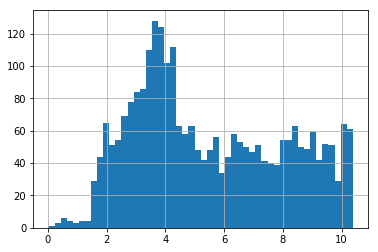


target 1 12.6407394841
30
0.05061757350354423 6.082005984900267 6.105903147002668


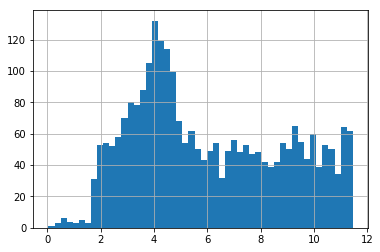


target 2 11.6683749084
30
0.04712496055612297 5.615892422518496 5.640410442924924


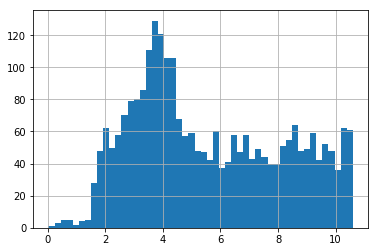


target 3 7.0496431738
30
0.027820814492962403 3.396040295206301 3.4096937452305642


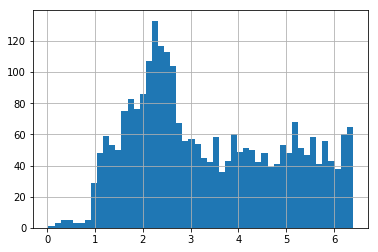


target 4 11.4252837645
30
0.04426239145456047 5.490873436434235 5.51121687165968


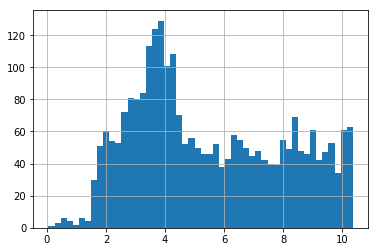


target 5 16.5301977869
30
0.06636132961042937 7.95010231825982 7.985953263700458


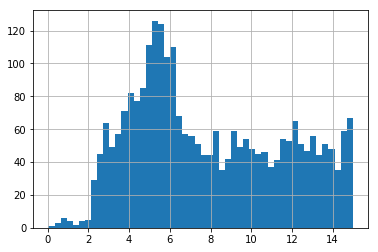


target 6 9.723645757
30
0.03799874104590954 4.68141208007688 4.699153236743522


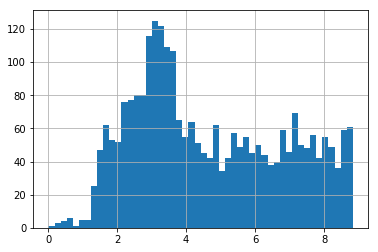


target 7 12.6407394841
30
0.0482542204797383 6.07715357920014 6.098666461636815


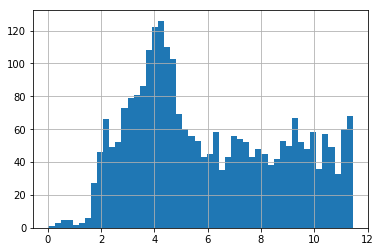


target 8 16.5301977869
30
0.06903269083283792 7.9461207893074315 7.980679522980183


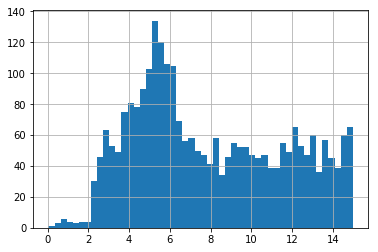

In [75]:
for t in range(len(config.target_lengths)):
    print "\ntarget", t, config.target_lengths[t]
    files= !ls /mnt/lanlep2019/input/sub/{GNO}/{t}/sub{GNO}*
    print len(files)
    b=pd.concat([pd.read_csv(u, index_col=0) for u in files], axis=1)
    b.columns=[  (u.split("/")[-1].split('.')[0]) for u in files]   
    b[b<0]=0
    print np.abs(b.median(1)-b.mean(1)).mean(),b.mean(1).mean(),b.median(1).mean()
    b.mean(1).hist(bins=50);plt.show();
    
    p=b.mean(1).to_frame().reset_index()
    p.columns=['seg_id','time_to_failure']
    fname =os.path.join(sub_path, "{}_sub{}_at{}.csv".format('mean',GNO,t))
    p.to_csv(fname,index=None)
    
    p=b.median(1).to_frame().reset_index()
    p.columns=['seg_id','time_to_failure']
    fname =os.path.join(sub_path, "{}_sub{}_at{}.csv".format('median',GNO,t))
    p.to_csv(fname,index=None)    

    #break

In [76]:
files= !ls /mnt/lanlep2019/input/sub/{GNO}/mean_sub{GNO}_at?.csv
tidx=[ int(u.split('.')[-2][-1]) for u in files]
tweights=np.array([weights[i] for i in tidx])
tweights=tweights/np.sum(tweights)
print len(files),zip(tidx,tweights)

b=pd.concat([pd.read_csv(u, index_col=0) for u in files], axis=1)
b.columns=[  (u.split("/")[-1].split('.')[0]) for u in files]   
b=(b*tweights).sum(1)

p=b.to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(sub_path, os.path.join(sub_path, "weighted_{}_sub{}.csv".format('mean',GNO)))
print p.mean()[0],p.median()[0]
p.to_csv(fname,index=None)

9 [(0, 0.154639175257732), (1, 0.154639175257732), (2, 0.154639175257732), (3, 0.030927835051546396), (4, 0.154639175257732), (5, 0.08247422680412372), (6, 0.030927835051546396), (7, 0.154639175257732), (8, 0.08247422680412372)]
6.00921665151155 5.347059729209622


In [77]:
files= !ls /mnt/lanlep2019/input/sub/{GNO}/median_sub{GNO}_at?.csv
tidx=[ int(u.split('.')[-2][-1]) for u in files]
tweights=np.array([weights[i] for i in tidx])
tweights=tweights/np.sum(tweights)
print len(files),zip(tidx,tweights)

b=pd.concat([pd.read_csv(u, index_col=0) for u in files], axis=1)
b.columns=[  (u.split("/")[-1].split('.')[0]) for u in files]   
b=(b*tweights).sum(1)

p=b.to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(sub_path, os.path.join(sub_path, "weighted_{}_sub{}.csv".format('median',GNO)))
print p.mean()[0],p.median()[0]
p.to_csv(fname,index=None)

9 [(0, 0.154639175257732), (1, 0.154639175257732), (2, 0.154639175257732), (3, 0.030927835051546396), (4, 0.154639175257732), (5, 0.08247422680412372), (6, 0.030927835051546396), (7, 0.154639175257732), (8, 0.08247422680412372)]
6.033226432981638 5.3623598273195885
